In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from UsefulFunctions import LinReg
from UsefulFunctions import ScatPlotandReg
from UsefulFunctions import ScatPlotNoReg

# Import Cleaned Data

In [2]:
#change the population data frame into a data frame with columns for state and year for combination
TCareAgg_df = pd.read_csv("CleanedData/USPop.csv")
SumCareAgg10 = TCareAgg_df[["State_Name","Y2010","Code","Item"]]
SumCareAgg10["Year"] = "2010"
SumCareAgg10 = SumCareAgg10.rename(columns={'Y2010':'Population'})
SumCareAgg11 = TCareAgg_df[["State_Name","Y2011","Code","Item"]]
SumCareAgg11["Year"] = "2011"
SumCareAgg11 = SumCareAgg11.rename(columns={'Y2011':'Population'})
SumCareAgg12 = TCareAgg_df[["State_Name","Y2012","Code","Item"]]
SumCareAgg12["Year"] = "2012"
SumCareAgg12 = SumCareAgg12.rename(columns={'Y2012':'Population'})
SumCareAgg13 = TCareAgg_df[["State_Name","Y2013","Code","Item"]]
SumCareAgg13["Year"] = "2013"
SumCareAgg13 = SumCareAgg13.rename(columns={'Y2013':'Population'})
SumCareAgg14 = TCareAgg_df[["State_Name","Y2014","Code","Item"]]
SumCareAgg14["Year"] = "2014"
SumCareAgg14 = SumCareAgg14.rename(columns={'Y2014':'Population'})
SumCareAgg15 = TCareAgg_df[["State_Name","Y2015","Code","Item"]]
SumCareAgg15["Year"] = "2015"
SumCareAgg15 = SumCareAgg15.rename(columns={'Y2015':'Population'})
SumCareAgg16 = TCareAgg_df[["State_Name","Y2016","Code","Item"]]
SumCareAgg16["Year"] = "2016"
SumCareAgg16 = SumCareAgg16.rename(columns={'Y2016':'Population'})
SumCareAgg17 = TCareAgg_df[["State_Name","Y2017","Code","Item"]]
SumCareAgg17["Year"] = "2017"
SumCareAgg17 = SumCareAgg17.rename(columns={'Y2017':'Population'})
NewCareAgg = pd.concat([SumCareAgg10,SumCareAgg11,SumCareAgg12,SumCareAgg13,SumCareAgg14,SumCareAgg15,SumCareAgg16,SumCareAgg17])
NewCareAgg.to_csv("CleanedData/USPopTall.csv")

/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1110/3994408901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg10["Year"] = "2010"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1110/3994408901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg11["Year"] = "2011"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1110/3994408901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [3]:
#import the neccesary dataframes
Deathdf = pd.read_csv("CensusData/DeathRate.csv")
Spendingdf = pd.read_csv("CleanedData/MedicareAggregateTall.csv")
Popdf = pd.read_csv("CleanedData/USPopTall.csv")


# Comparison of Spending and Mortality Rate

In [10]:
#Select necessary columns and combine on State (Death and Aggregate)
#print(Popdf)
#Popdf = Popdf[['Year','State','Population']]
#Popdf = Popdf.rename(columns = {'State_Name':'State'})
#merge the required data frames
Mortatlitydf = pd.merge(Deathdf,Popdf,how = 'inner',on=['State','Year'])
Mortatlitydf['Population'] = Mortatlitydf['Population']*1000
Mortatlitydf['Mortality Rate']= round((Mortatlitydf['Deaths']/Mortatlitydf['Population'])*100,2)
Spendingdf = Spendingdf.sort_values(by=['Year','State_Name'])
Mortatlitydf = Mortatlitydf.sort_values(by = ['Year','State'])
Percapspend = pd.merge(Spendingdf,Popdf,how='inner',right_on=['State','Year'],left_on=['State_Name','Year'])
Percapspend["Capita Spending"] = round(Percapspend["Cost"]/Percapspend["Population"]*1000,2)
#sum the dataframes to create the graph
SumSpenddf = Spendingdf.groupby(['Year','State_Name'])
SumSpenddf = SumSpenddf.sum()
Percapspend= Percapspend.groupby(['Year','State'])
Sumcapspend = Percapspend.sum()
Sumcapspend

Unnamed: 0  \
Year State                       
2010 Alabama              2790   
     Alaska               2800   
     Arizona              2810   
     Arkansas             2820   
     California           2830   
...                        ...   
2017 Virginia             3250   
     Washington           3260   
     West Virginia        3270   
     Wisconsin            3280   
     Wyoming              3290   

                                                           State_Name    Cost  \
Year State                                                                      
2010 Alabama        AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...   16602   
     Alaska         AlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlaskaAlas...    1125   
     Arizona        ArizonaArizonaArizonaArizonaArizonaArizonaAriz...   17880   
     Arkansas       ArkansasArkansasArkansasArkansasArkansasArkans...    9500   
     California     CaliforniaCaliforniaCaliforniaCaliforniaCalifo...  106014   
...                                                               ...     ...   
2017 Virginia       VirginiaVirginiaVirginiaVirginiaVirginiaVirgin...   29002   
     Washington     WashingtonWashingtonWashingtonWashingtonWashin...   24500   
     West Virginia  West VirginiaWest VirginiaWest VirginiaWest Vi...    9386   
     Wisconsin      WisconsinWisconsinWisconsinWisconsinWisconsinW...   22646   
     Wyoming        WyomingWyomingWyomingWyomingWyomingWyomingWyom...    2007   

                    Code                                               Item  \
Year State                                                                    
2010 Alabama          55  Medicare/Personal Health Care (Millions of Dol...   
     Alaska           55  Medicare/Personal Health Care (Millions of Dol...   
     Arizona          55  Medicare/Personal Health Care (Millions of Dol...   
     Arkansas         55  Medicare/Personal Health Care (Millions of Dol...   
     California       55  Medicare/Personal Health Care (Millions of Dol...   
...                  ...                                                ...   
2017 Virginia         55  Medicare/Personal Health Care (Millions of Dol...   
     Washington       55  Medicare/Personal Health Care (Millions of Dol...   
     West Virginia    55  Medicare/Personal Health Care (Millions of Dol...   
     Wisconsin        55  Medicare/Personal Health Care (Millions of Dol...   
     Wyoming          55  Medicare/Personal Health Care (Millions of Dol...   

                    Population  Capita Spending  
Year State                                       
2010 Alabama             47860          3468.85  
     Alaska               7140          1575.63  
     Arizona             64070          2790.70  
     Arkansas            29220          3251.19  
     California         373200          2840.68  
...                        ...              ...  
2017 Virginia            84710          3423.67  
     Washington          74280          3298.33  
     West Virginia       18190          5159.98  
     Wisconsin           57930          3909.19  
     Wyoming              5800          3460.34  

[408 rows x 7 columns]

The r^2-value is: 0.2672528777574871


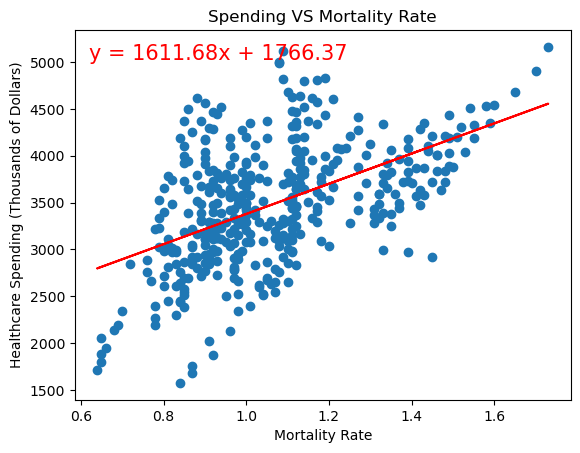

The r^2-value is: 0.008442357931299401


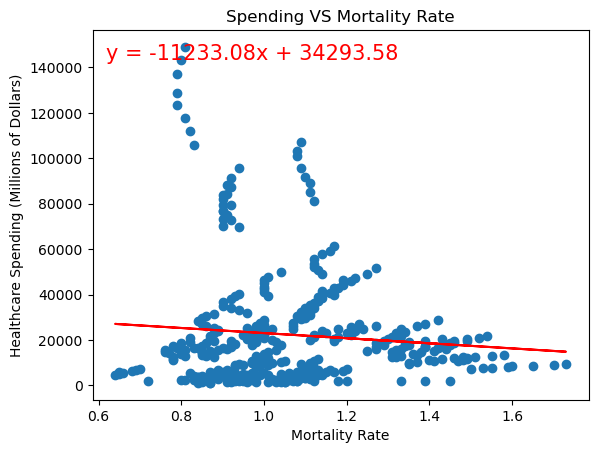

In [12]:
#create the scatter plot for mortality rate
ScatPlotandReg(Mortatlitydf['Mortality Rate'],Sumcapspend['Capita Spending'],"Mortality Rate","Healthcare Spending (Thousands of Dollars)","Spending VS Mortality Rate","SpendingPerCapVSMortality")
ScatPlotandReg(Mortatlitydf['Mortality Rate'],SumSpenddf['Cost'],"Mortality Rate","Healthcare Spending (Millions of Dollars)","Spending VS Mortality Rate","SpendingVSMortality")

** Analysis of Spending and Mortality Rate ** : There is small positive correlation between per capita state spending and mortality rate